In [35]:
# Jesse Hahm
# 12/12/2015
# import a proximity raster (generated in QGIS) whose pixel values are
# horizontal distance in meters to nearest geomorphic channel
# create empirical PDF and plot with statistics

import numpy as np
import gdal
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline
import statsmodels.api as sm

In [36]:
ds = gdal.Open('D:\\GIS\LIDAR\ANGELO-SAGEHORN-COMBINED\proximity\HankProx.tif')
band1 = ds.GetRasterBand(1)
array1 = band1.ReadAsArray().flatten()
array = array1[np.nonzero(array1)]
array

array([ 105.233078  ,  105.17128754,  107.91200256, ...,   40.        ,
         39.        ,   39.        ], dtype=float32)

In [37]:
sm?

In [38]:
def kde_fit(array):
    dens = sm.nonparametric.KDEUnivariate(array.astype(np.float))
    dens.fit()
    return dens


In [39]:
paths = kde_fit(array)

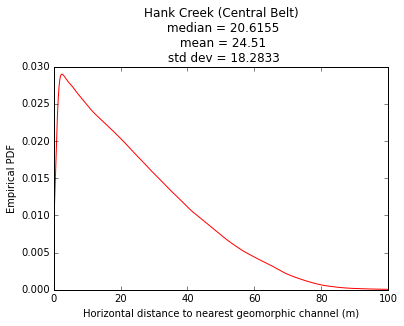

In [40]:
fig = plt.figure()
plt.plot(paths.support, paths.density, lw=1, color='r');

#plt.xscale('log')
plt.xlim([0,100])
plt.xlabel("Horizontal distance to nearest geomorphic channel (m) ")
plt.ylabel("Empirical PDF")
plt.title("Hank Creek (Central Belt) \n median = " + str(np.median(array)) + "\n mean = " + str(np.mean(array)) + "\n std dev = " + str(np.std(array)))
fig.savefig('Figs\\hankPath.pdf', transparent=True, bbox_inches='tight', pad_inches=0.2)